## Esame Metodi Numerici  12 Giugno 2024 - Turno II Ore 12,30

## Esercizio 1
Si condiderino i due sistemi lineari:

     A  x = b 

    A1 x1 = b1

dove A, A1 sono le matrici dei coefficienti, b e b1 sono i termini noti, ed x ed x1 sono i vettori incongiti da determinare.
I dati di questi due sistemi lineari sono contenuti nel file **testII.mat**.


- Si implementino e si testino sui dati forniti almeno due metodi che sono adatti a risolvere sistemi lineari con le caratteristiche delle matrici dei coefficienti date in input.
                                      **punti 8**
- Si confrontino i risultati ottenuti e si giustifichino utilizzando  e richiamando gli aspetti teorici dei metodi implementati.
                                      **punti 3**


**Totale Punti 11**

Per la lettura dei dati procedere nel seguente modo:

``from scipy.io import loadmat``

``import numpy as np``

``dati = loadmat('testII')``

``A=dati["A"] ``

``A=A.astype(float)``

`` b=dati["b"] ``

`` b=b.astype(float)``

``A1=dati["A1"] ``

``A1=A1.astype(float)``

`` b1=dati["b1"] ``

`` b1=b1.astype(float)``


In [4]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt

dati = loadmat('testII')
A=dati["A"]
A=A.astype(float)
b=dati["b"]
b=b.astype(float)
A1=dati["A1"]
A1=A1.astype(float)
b1=dati["b1"]
b1=b1.astype(float)

def print_dim(mat_name, mat):
    print(f"Dimensioni {mat_name} (righe x colonne): {mat.shape}")

print_dim("A", A)
print_dim("A1", A1)

Dimensioni A (righe x colonne): (500, 500)
Dimensioni A1 (righe x colonne): (500, 500)


In [13]:
# Entrambe le matrici sono grandi!
# Guardiamo se sono sparse

def is_sparse(A):
    return np.count_nonzero(A) / A.size < .33

print("A è sparsa", is_sparse(A))
print("A1 è sparsa", is_sparse(A1))

A è sparsa True
A1 è sparsa True


In [3]:
# Entrambe le matrici sono grandi e sparse, per cui
# i metodi risolutivi più adatti sono quelli iterativi

def is_dd(A):
    d = np.diag(A)
    row_sum = np.sum(np.abs(A), axis=1)
    return np.all(np.abs(d) > np.abs(row_sum - d))

print("A è a diagonale strettamente dominante", is_dd(A))
print("A1 è a diagonale strettamente dominante", is_dd(A1))

def is_symmetric(A):
    return np.allclose(A, A.T, atol=np.spacing(1))

def is_def_pos(A):
    return is_symmetric(A) and np.all(np.linalg.eigvals(A) > 0)

print("A è definita positiva", is_def_pos(A))
print("A1 è definita positiva", is_def_pos(A1))

A è a diagonale strettamente dominante False
A1 è a diagonale strettamente dominante False
A è definita positiva True
A1 è definita positiva True


In [27]:
def steepest_descent(A, b, x0, maxit, toll=np.spacing(1)):
    x_curr = x0.copy()
    attempts = [ x_curr.copy() ]
    stop = False
    while not stop:
        # residuo
        r_k = A @ x_curr - b
        # direzione
        p_k = -r_k
        # step-size
        alpha_k = (r_k @ r_k) / ((A @ r_k) @ r_k)
        # aggiornamento iterato
        x_curr += alpha_k * p_k
        attempts.append(x_curr.copy())
        if np.linalg.norm(r_k) / np.linalg.norm(b) < toll or len(attempts) > maxit:
            stop = True
    
    return x_curr, attempts

def gauss_seidel(A, b, x0, it_max, toll=np.spacing(1)):
    errore=1000
    d=np.diag(A) 
    D=np.diag(d)
    E=np.tril(A,-1)
    F=np.triu(A,1) 
    M=E+D 
    N=-F 
    T=np.linalg.inv(M)@N
    q=np.linalg.inv(M)@b
    autovalori=np.linalg.eigvals(T)
    raggiospettrale=np.max(np.abs(autovalori))
    print("raggio spettrale Gauss-Seidel ",raggiospettrale)
    it=0
    er_vet=[]
    while it<it_max and np.abs(errore) > toll: 
        x=T@x0+q
        errore=np.linalg.norm(x-x0)/(np.linalg.norm(x) if np.linalg.norm(x) != 0 else 1)
        er_vet.append(errore)
        x0=x.copy()
        it=it+1
    return x,it,er_vet

maxit = 100_000
x0 = np.zeros(A.shape[0])
print(np.linalg.det(A1))
x, attempts_x, errors = gauss_seidel(A, b.reshape(A.shape[0],), x0, maxit)

x01 = np.zeros(A1.shape[0])
x1, attempts_x1 = steepest_descent(A1, b1.reshape(A1.shape[0],), x01, maxit)
print(x1)

0.0
raggio spettrale Gauss-Seidel  0.9399020442983528
[1.         1.         1.00000004 0.99999956 1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.00000006 0.99999992 1.
 1.         1.00000001 1.         1.         1.         1.
 1.         1.         1.         0.99999999 1.         1.00000002
 1.         1.00000001 0.99999998 1.00000007 1.         1.
 1.         1.         1.         1.         1.         1.
 1.00000002 1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         0.99999981 1.         1.
 0.99999999 0.99999999 1.00000001 1.         1.         0.99999999
 1.         1.         0.99999995 1.         1.         1.
 1.         1.         0.99999999 1.         0.99999998 0.99999991
 1.         1.         1.         1.         1.         1.00000002
 1.         1.         0.9999

# Esercizio 2

-  Si consideri la funzione $$f(x)=2\cdot x^4-(7/2) \cdot x^3+(3/4) \cdot x^2+x-1/4$$  

-  Si rappresenti il grafico della funzione in [-1,2] e si determini in quanti punti la funzione si annulla.  **[punti: 1]**

-  Si implementi  il metodo di Newton per il calcolo degli zeri di una funzione non lineare. **[punti: 3]**

-  Si implementi il metodo di Bisezione per il calcolo degli zeri di una funzione non lineare. **[punti: 3]**

-  Osservando il grafico della funzione, si identifichi,  per ogni punto in cui si annulla, un opportuno intervallo che lo contenga. Si applichi il metodo di Bisezione per determinare lo zero della funzione in tale sottointervallo.  Si dica se è possibile calcolare tutti gli zeri facendo uso del metodo di bisezione, richiamando il teorema su cui si basa il metodo di bisezione.  **[punti: 2]**

-  Osservando il grafico della funzione, si identifichi,  per ogni punto in cui si annulla, un opportuno iterato iniziale in un intorno dello zero e si utilizzi  il metodo di Newton per determinare lo zero della funzione. Si calcoli l'ordine del metodo usando la funzione stima_ordine.
   **[punti: 2]**

-  Nel caso in cui si verifichi che il metodo di Newton abbia ordine 1, spiegare il perchè richiamando la teoria e modificare il metodo affinchè il suo ordine sia 2.  **[punti: 3]**

  **Totale punti 14**



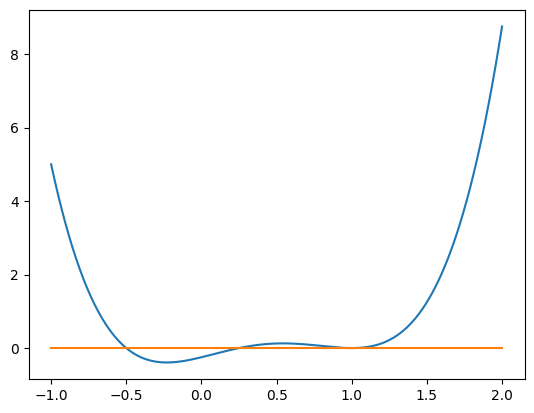

Intervallo [-0.62, -0.45]
-0.5
Intervallo [0.0, 0.5]
0.25
Intervallo [0.8, 1.1]
Condizioni del Teorema degl Zeri non rispettate!
None
-0.5
0.25
0.9999999910609787


In [34]:
import math
import sympy as sy

f = lambda x: 2*x**4 - (7/2)*x**3 + (3/4)*x**2 + x - 1/4
x_val = np.linspace(-1, 2, 1000)
plt.plot(x_val, f(x_val), x_val, np.zeros(x_val.shape))
plt.show()

def sign(x):
    return math.copysign(1, x)
    
def bisezione(f, a, b, maxit, tolx=np.spacing(1), tolf=np.spacing(1)):
    if sign(f(a)) == sign(f(b)):
        print("Condizioni del Teorema degl Zeri non rispettate!")
        return None, None
    attempts = [ ]
    a_k = a
    b_k = b
    stop = False
    while not stop:
        c_k = (a_k + b_k) / 2
        error_x = np.abs(a_k - b_k)
        error_f = np.abs(f(c_k))
        attempts.append(c_k)
        if sign(f(c_k)) < 0:
            b_k = c_k
        elif sign(f(c_k)) > 0:
            a_k = c_k
        else: # ho finito!
            return c_k, attempts
        stop = len(attempts) > maxit or\
            error_x < tolx or\
            error_f < tolf
    return attempts[-1], attempts

def newton(f, fp, x0, maxit, tolx=np.spacing(1), tolf=np.spacing(1)):
    x_next, x_curr = None, x0
    attempts = [ x_curr ]
    stop = False

    while not stop:
        x_next = x_curr - (f(x_curr) / fp(x_curr))
        attempts.append(x_next)
        error_x = np.abs(x_curr - x_next) / np.abs(x_curr)
        error_f = np.abs(f(x_next))
        if len(attempts) > maxit or\
            error_x < tolx or\
            error_f < tolf:
            stop = True
        else:
            x_curr = x_next

    return attempts[-1], attempts

x_sym = sy.symbols('x')
f_sym = 2*x_sym**4 - (7/2)*x_sym**3 + (3/4)*x_sym**2 + x_sym - 1/4
fp_sym = sy.diff(f_sym, x_sym)
fp = sy.lambdify(x_sym, fp_sym)

maxit = 1_000
bis_res, bis_attempts = bisezione(f, -.62, -.45, maxit)
new_res, new_attempts = newton(f, fp, -.7, maxit)

# Sembrano esserci 3 zeri
class Interval:
    def __init__(self, start, end):
        self.start = start
        self.end = end

    def __str__(self):
        return f"[{self.start}, {self.end}]"

intervals = [
    Interval(-.62, -.45),
    Interval(0.0, 0.5),
    Interval(.8, 1.1)
]

for interval in intervals:
    print(f"Intervallo {interval}")
    bis_res, bis_attempts = bisezione(f, interval.start, interval.end, maxit)
    print(bis_res)

initial_guesses = [-.7, .1, .7]
for initial_guess in initial_guesses:
    new_res, new_attempts = newton(f, fp, initial_guess, maxit)
    print(new_res)

## Domande Intelligenza Artificiale
**NB: Ogni risposta esatta +0.5 punti, ogni risposta errata -0.5 punti. La mancanza di risposta 0 punti**

**1 Risolvere un problema mediante Machine Learning significa:**

 -  Fornire alla macchina i dati affinchè impari da sola a risolvere il problema

 - Fornire alla macchina solo dati etichettati affinchè impari da sola a risolvere il problema

 - Fornire alla macchina solo dati non etichettati affinchè impari da sola a risolvere il problema

 - Fornire alla macchina le esatte istruzioni per risolvere il problema

**2  A cosa serve il validation set?**

-  A trovare i migliori iperparametri del modello

-  Ad addestrare il modello

-  A testare il modello

-  A trovare le etichette dei dati di input

**3  Cosa è un Multi-Layer Perceptron?**

-  Una rete multi-livello composta da neuroni completamente connessi

-  Una rete muti-livello composta da livelli convolutivi e neuroni completamente connessi

-  Una rete a singolo livello composta da neuroni completamente connessi

- Un neurone artificiale con un determinato input e determinati valori di uscita

**4 Il livello softmax**

- Trasforma i digits della rete in probabilità

- Trasforma le probabilità della rete in digits

-  Normalizza i valori di input della rete

-  È indispensabile nel task di regressione

**5 In cosa consiste il task di regressione?**

· Nel predire un valore continuo in output

· Nel predire una classe in output

· Nel predire un gruppo di appartenenza del dato di input

· Nel predire una categoria in output

## Domande Aperte

**6. ** Forward e backward Propagation per l'allenamento di una rete neurale** [punti 1.5]

**7 Metodo di ottimizzazione del gradient descent con momento**. Motivazioni e formula di aggiornamento dei pesi e commenti. [punti 3]

In [ ]:
**